In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=500,centers=3,n_features=2)

<Axes: >

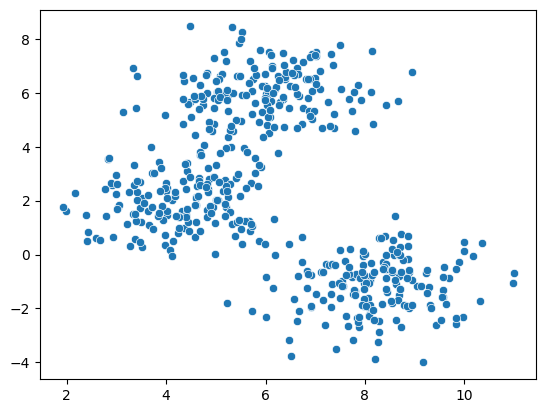

In [8]:
sns.scatterplot(x=x[:,0],y=x[:,1])

In [9]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
X_train_scaled=scaled.fit_transform(X_train)
X_test_scaled=scaled.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for i in range(1,11):
  Kmean=KMeans(n_clusters=i,init='k-means++')
  Kmean.fit(X_train_scaled)
  wcss.append(Kmean.inertia_)

In [15]:
wcss

[799.9999999999992,
 301.4677138274436,
 142.13372361015195,
 117.28495671742046,
 114.07479241787341,
 72.63925316632807,
 65.74591479245572,
 59.32848493227687,
 54.212097073577404,
 50.45643038485174]

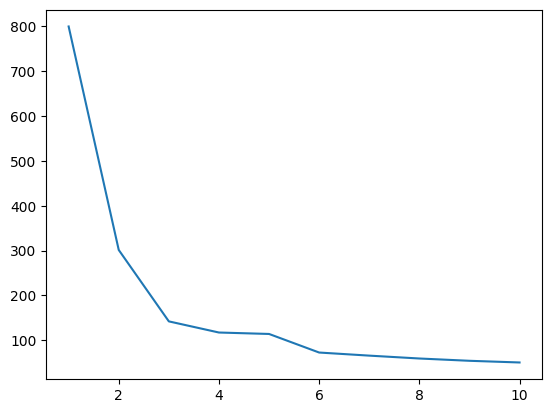

In [18]:
plt.plot(range(1,11),wcss)
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [20]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0,
       0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1,
       1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0,
       0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 0,

<Axes: >

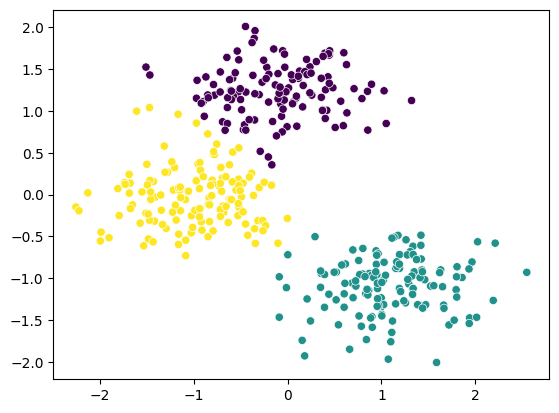

In [21]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1],c=kmeans.fit_predict(X_train_scaled))

<Axes: >

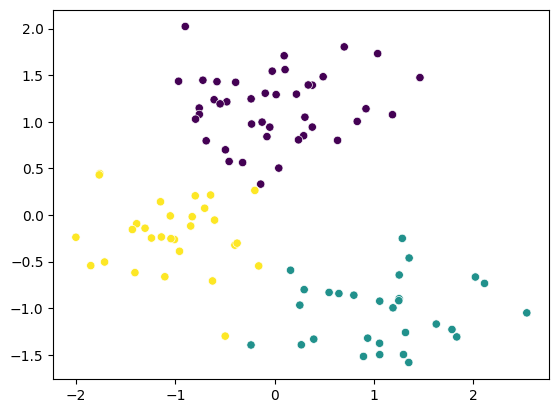

In [22]:
sns.scatterplot(x=X_test_scaled[:,0],y=X_test_scaled[:,1],c=kmeans.predict(X_test_scaled))

In [23]:
!pip install kneed

In [24]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [27]:
kl.elbow

np.int64(3)

**Shilhoute score**

In [28]:
from sklearn.metrics import silhouette_score

In [30]:
sh_coef=[]
for k in range(2,11):
  k_means=KMeans(n_clusters=k,init='k-means++')
  k_means.fit(X_train_scaled)
  sh_score=silhouette_score(X_train_scaled,k_means.labels_)
  sh_coef.append(sh_score)

In [31]:
sh_coef

[np.float64(0.5766147567451823),
 np.float64(0.5851822894168379),
 np.float64(0.48023629008951685),
 np.float64(0.4899987561416219),
 np.float64(0.4067720130319556),
 np.float64(0.37017452228305503),
 np.float64(0.37292182167119703),
 np.float64(0.367629389358505),
 np.float64(0.34814766265617453)]

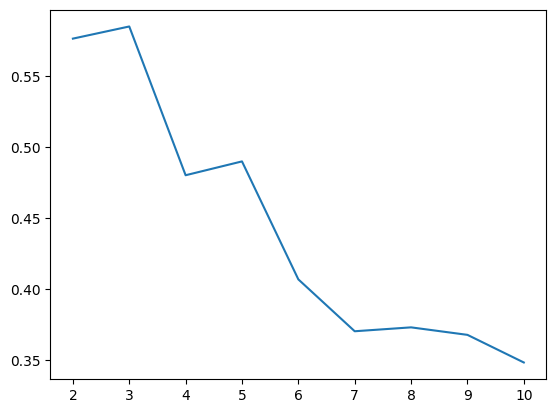

In [32]:
plt.plot(range(2,11),sh_coef)